# **Title: Linear & Multiple Regression on Housing Dataset (Housing.csv)**
# **Tools: Pandas, Scikit-learn, Matplotlib, Seaborn**
# **Objective: Implement and understand simple & multiple linear regression, and evaluate performance using MAE, MSE, and R².**

** Step 1: Setup & Import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display plots inline
%matplotlib inline


** Step 2: Load the Dataset**



In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first 5 rows
print("DataFrame loaded successfully. First 5 rows:")
display(df.head())

DataFrame loaded successfully. First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Step 3: Data Inspection & Preprocessing**



In [15]:
# Check structure
df.info()

# Summary statistics
df.describe()

# Check for categorical variables
df.select_dtypes(include='object').columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

   **Step 4: Encode Categorical Features**

In [16]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Confirm all numeric
df.dtypes


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
parking,int64
mainroad_yes,bool
guestroom_yes,bool
basement_yes,bool
hotwaterheating_yes,bool


**Step 5: Define Features (X) and Target (y)**

In [18]:
# Define target column (replace with your actual column)
target = 'price'  # or whatever your target is
X = df.drop(columns=[target])
y = df[target]


**Step 6: Train-Test Split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 7: Fit Linear Regression Model**

In [20]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model details
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 260032.35760741215
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


**Step 8: Evaluate the Model**

In [21]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


**Step 9: Visualize Coefficients**

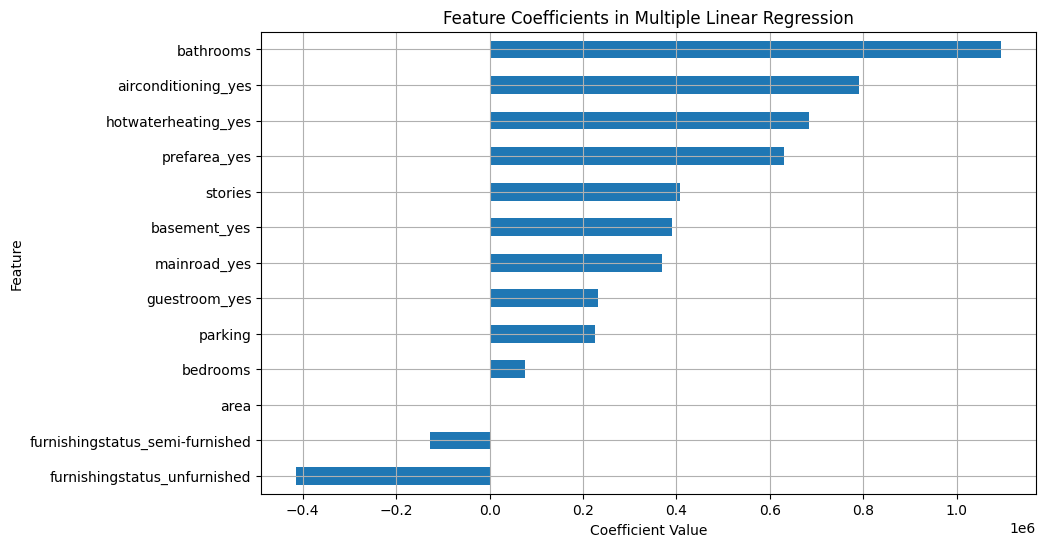

In [22]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Coefficients in Multiple Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


**Step 10: Visualize Predictions vs Actual**

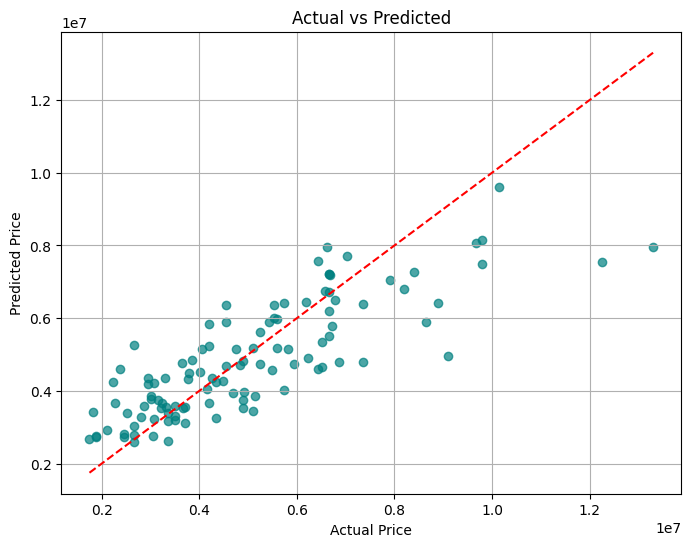

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


**For: Advanced Options for Better Modeling**

**1. Regularization (Ridge / Lasso)**



In [24]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))


Ridge R²: 0.6524978002155007
Lasso R²: 0.6529242131651091


**2. Feature Selection**

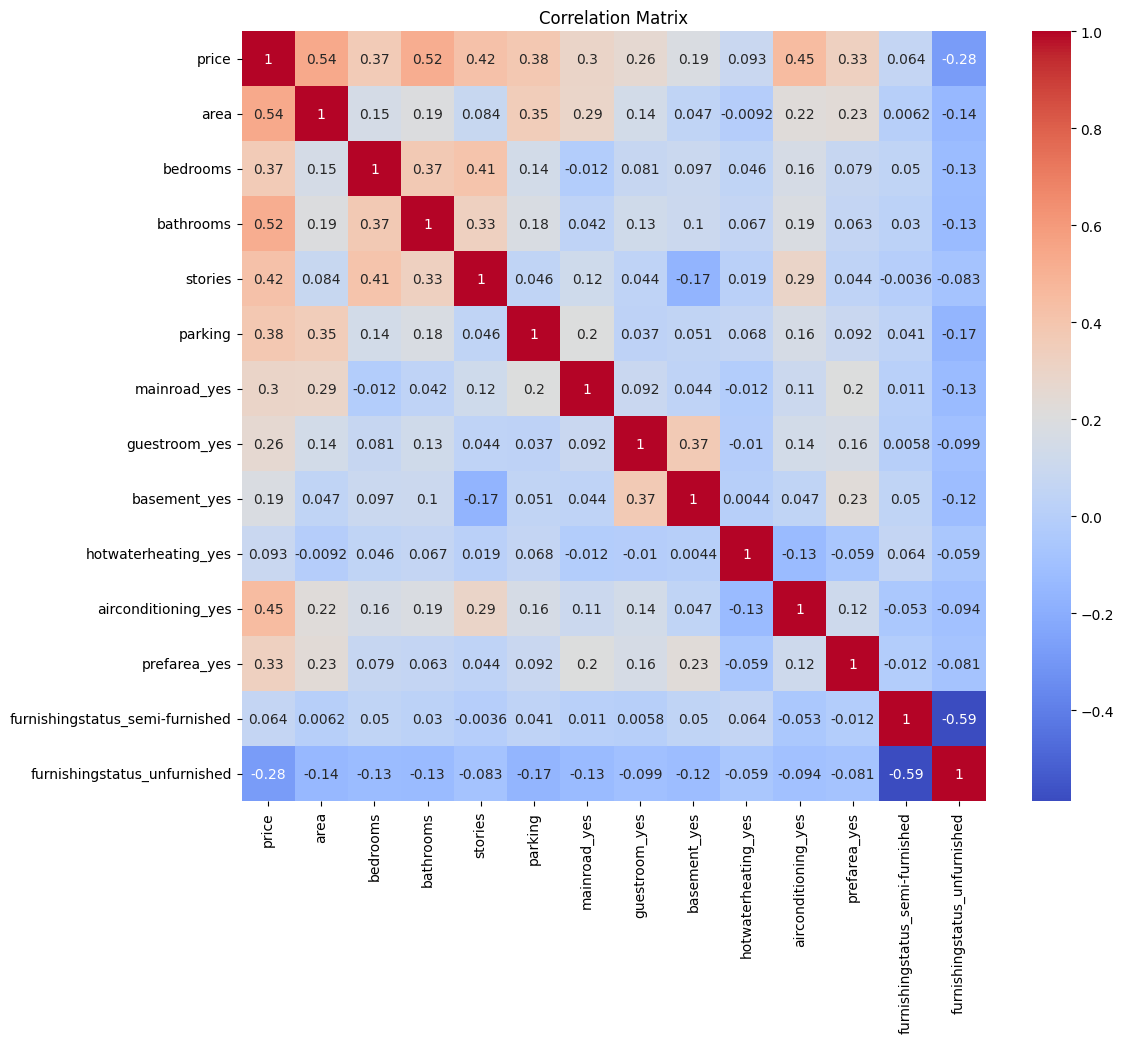

In [25]:
# Check correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


** 3. Residuals Plot**

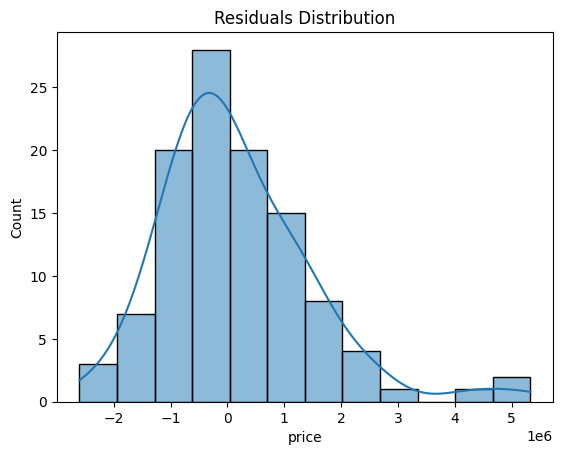

In [26]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()
